# Content-Based Image Retrieval 

Implementing a very simple **content based image search system** and **evaluating its performance**. The dataset used is **U. Kentucky Benchmark Image Database**.

**NOTE:** The dataset won't be posted on the GitHub, you could use the link to download the dataset: http://www.ee.columbia.edu/~rj2349/index_files/Homework1/

**The dataset should be placed in** *data/hw1* directory in order for IPython Notebook to work correctly.

The original database includes 2,550 objects with 4 images for each object (total of 10,200 images). The images were taken to simulate variations of lighting, view, occlusion, scale, etc.

## Problems

- Write a program to extract the color histogram of each of the 2,000 images. Choose the parameters required with justifications. Implement your own histogram code and compare its results with open-source API like OpenCV and numpy.

- Write a program to measure the L2 distance between color histograms of two images.

- Use 5 images shown above (ukbench00004.jpg; ukbench00040.jpg; ukbench00060.jpg; ukbench00588.jpg; ukbench01562.jpg) as queries. For each query image, find 10 best matches from the 2,000 images based on the color histogram similarity. Plot the query image and the 10 returned matches (use icons of reduced resolution to save space)

- Write a program to measure and plot the P-R curve for each query

- Discuss and explain success and failure cases.

- (Optional) try to improve the results by using a different feature or distance metrics (bag of words, 3d-color histograms etc) of your choice. Justify your choice with qualitative reasons and back it up with performance comparison results.

In [13]:
import cv2
import numpy as np
import os 
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

In [24]:
# Path constants
work_dir_path = os.getcwd()
data_dir_path = os.path.join(work_dir_path, 'data')

# Please pay attention that the downloaded dataset should be in this folder
dataset_dir_path = os.path.join(data_dir_path, 'hw_1')

## Helper functions

All helper functions and core functions would be moved into separate pyscript in the folder *scripts/*

In [33]:
def read_image(img_name):
    return cv2.imread(get_img_abs_path(img_name))

def get_img_abs_path(img_name):
    return os.path.join(dataset_dir_path, img_name)

In [69]:
def color_hist(image):
    """
    Creates a color histogram of the input image
    
    Input:
    image - matrix, input image matrix
    
    Output:
    hist - numpy array consisting of 256 values, each will indicate
    the number of occurences of pixel intensity
    
    TODO: Grayscale images
    """
    
    hist = np.zeros(256)
    
    flat_img = image.ravel()
    
    # Iterate over each pixel
    for pixel in flat_img:
        # Increment the occurence of pixel value
        hist[pixel] += 1
    
    return hist


def show_color_hist(hist):
    plt.hist(hist, range = (0, 255))
    plt.title('Color histogram')
    plt.show()

## Testing the color histogram solution

In [70]:
# Let's load a sample image and compute it's color histogram
test_img = read_image(os.listdir(dataset_dir_path)[-1])
test_hist = color_hist(test_img)

In [71]:
# Let's use numpy solution for comparison
np_hist = np.histogram(test_img.ravel(), 256, [0,256])

In [72]:
# Now let's compare two vectors
print("Custom solution returns the same result as NumPy solution: ", (test_hist == np_hist[0]).all())

Custom solution returns the same result as NumPy solution:  True


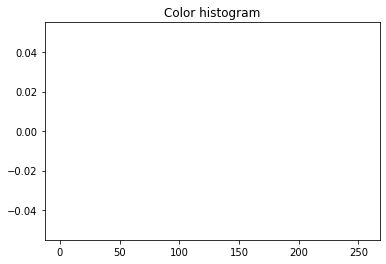

In [73]:
show_color_hist(test_hist)